- In this notebook, we are going to implement simplest Artificail Neural Network(ANN) algorithm with the help of tensorflow.
<h3>
  First of all, What is neural network and how it works?
</h3>
<h4>
  Neural networks is like human brain which recognize the patterns, images, colours in pictures and clasify according to it.Also, solve distinguish problems in the fields of Machine learning, deep learning and AI.<br><br>
  Easiest to build and simpler to understand neural network is Artificial neural networks which is also known as simulated neural network, and their names and structures are inspired by the human brain.<br><br>
  Artificial neural networks (ANNs) are built with hidden layers connected to previous layer's nodes either fully or partially(Drop-out). Like machine learning algorithm, in neural networks weights are updated during backpropogation process. At startes, weights are generally defined as randon numbers rather than zeros which leads the neurons to learn the same features during training. <br><br>
  So Let's see how we can dive into first and simplest Artificial neural network.
</h4>

---



## Importing Libraries

- To build Neural network, in this notebook we are going to use tensorflow framework as it is standard for educational purpose.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

## Loading Dataset for Linear Regression

- Dataset is for Linear regression in which there is value of x and dependent value y which we will predict by building simple artificial neural network.

In [ ]:
data = "/content/train.csv"
df = pd.read_csv(data)

In [ ]:
df.head() # To get first 5 rows

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


### Let's see how our data looks like.

Text(0, 0.5, 'Y')

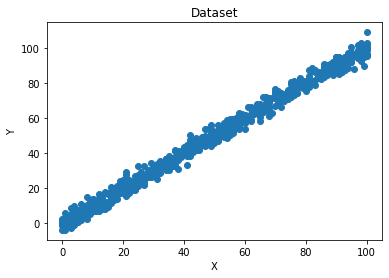

In [ ]:
plt.scatter(X, Y)
plt.title('Dataset')
plt.xlabel("X")
plt.ylabel("Y")

## Data preprocessing

- Before starting to make model structure and training, we will do data preproceesing in which data cleaning, normalization takes place.
- Data preprocessing is very important in any model building task because our model accuracy is dependant upon data so more clean data means more efficient data.
- In this notebook, we will clean nan values. To do so, there are different options like first is to drop that row and others include replacing nan with value of average, max, medium, etc.

In [ ]:
df.info() # To get information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
df.isnull().sum() # To show total number of null values in dataframe

x    0
y    1
dtype: int64

In [ ]:
df.dropna(inplace=True) # To drop na value row and replace it with original dataframe

In [ ]:
X = df['x'].values # Input value
Y = df['y'].values # Dependent value

## Modeling

- In this notebook, we are going to build model with tensorflow framework. In tensorflow, there are 3 methods to build neural network model.
1. Using Sequencial API
2. Using Functional API
3. Using Model Subclassing

- Although, the easiest method to make model is using sequencial API, here we will be making simple neural network model using <b>functional API</b>.So let's get started.

- Here is example of methods of writing model structure.
<img src = "https://miro.medium.com/max/1400/1*WzwKtnA0LEhiCGdWTTpLaA.png">

- Image is taken from Internet.

In [ ]:
def model():
  inp = tf.keras.Input((1))             # Input layer
  net = tf.keras.layers.Dense(4)(inp)   # Hidden layer 1
  net = tf.keras.layers.Dense(4)(net)   # Hidden layer 2
  op  = tf.keras.layers.Dense(1)(net)   # Output layer

  model = tf.keras.Model(inputs = [inp], outputs = [op])    # Defining Model
  
  # Compiling model with appropriate parameters
  model.compile(loss = tf.keras.losses.MeanAbsoluteError(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)) 
  
  return model

In [ ]:
model = model()

# To get summary of model like parameter count and layers name 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training our model for 100 epochs and by 16 batches(Usefull when data is more)
history = model.fit(x = X, y = Y,batch_size=16, epochs = 100)

Epoch 1/100
44/44 [==============================] - 0s 1ms/step - loss: 65.8667
Epoch 2/100
44/44 [==============================] - 0s 956us/step - loss: 61.2379
Epoch 3/100
44/44 [==============================] - 0s 988us/step - loss: 56.7355
Epoch 4/100
44/44 [==============================] - 0s 962us/step - loss: 51.9300
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 46.4350
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 39.9266
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 32.1808
Epoch 8/100
44/44 [==============================] - 0s 992us/step - loss: 23.1637
Epoch 9/100
44/44 [==============================] - 0s 1ms/step - loss: 12.6670
Epoch 10/100
44/44 [==============================] - 0s 1ms/step - loss: 3.5605
Epoch 11/100
44/44 [==============================] - 0s 1ms/step - loss: 2.3235
Epoch 12/100
44/44 [==============================] - 0s 1ms/step - loss: 2.3152
Epoch 13/100
44/44 [

In [ ]:
model.predict([38])

array([[38.058372]], dtype=float32)

## Visualization

Text(0, 0.5, 'Loss')

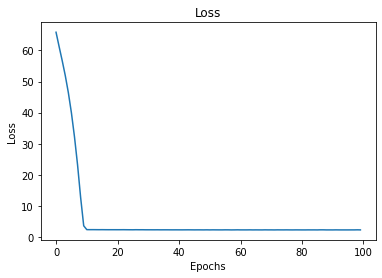

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

- Getting predicted value for all X value

In [ ]:
y_preds = model.predict(X)

#### Weights of model

In [ ]:
model.get_weights()

[array([[-0.37482524, -0.21314773, -0.3851546 ,  0.7211719 ]],
       dtype=float32),
 array([-0.02550269,  0.01446619,  0.07469458, -0.11153169], dtype=float32),
 array([[ 0.41727817, -1.1593966 , -0.06526762, -0.5727724 ],
        [ 0.05837815, -1.0951852 ,  0.0324135 , -0.9947022 ],
        [-0.1630445 ,  0.15298577,  0.03729813,  0.16038027],
        [ 0.621241  ,  1.1176963 , -0.1348401 , -0.44156536]],
       dtype=float32),
 array([-0.00742224, -0.00394698,  0.00868526, -0.00015398], dtype=float32),
 array([[ 0.5293404],
        [ 0.5344096],
        [-0.4104602],
        [ 0.5983508]], dtype=float32),
 array([0.00023291], dtype=float32)]

#### Plotting predicted values

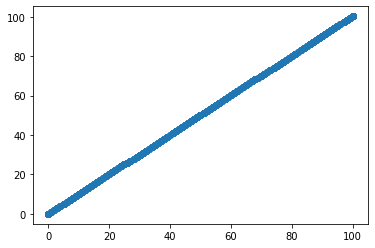

In [ ]:
plt.scatter(X, y_preds)

<h3>
  As it can be seen that model has successfully implemented Linear regression.
</h3>